In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/mcqs_human_eval_completed.csv')[:150]

gpt_on_sans = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/run_results_clean/sans/sans-result-gpt-4o-gpt4o-all.csv')

gpt_on_sans = gpt_on_sans.groupby(['question', 'Correct Answer', 'Discussion']).first().reset_index()

df = df.merge(gpt_on_sans[['question', 'Correct Answer', 'Discussion', 
                   'llama_score']],
         how='left',
         left_on=['question_stem', 'correct_answer', 'discussion',
                  ],
         right_on=['question', 'Correct Answer', 'Discussion',
                   ])
df['llama_score'] = df['llama_score'].astype(float)
df = df.rename(columns={'llama_score': 'gpt_on_sans'}).drop(columns=['question', 'Correct Answer', 'Discussion'])

gpt_on_gpt_synth = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/run_results_clean/gpt/sans-result-gpt-4o-gpt4o-all.csv')

df = df.merge(gpt_on_gpt_synth[['question', 'Correct Answer', 'discussion', 
                   'llama_score']],
         how='left',
         left_on=['question_stem', 'correct_answer', 'discussion',
                  ],
         right_on=['question', 'Correct Answer', 'discussion',
                   ])
df['llama_score'] = df['llama_score'].astype(float)
df = df.rename(columns={'llama_score': 'gpt_on_gpt_synth'}).drop(columns=['question', 'Correct Answer'])

gpt_on_claude_synth = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/run_results_clean/claude/sans-result-gpt-4o-gpt4o-all.csv')

df = df.merge(gpt_on_claude_synth[['question', 'Correct Answer', 'discussion', 
                   'llama_score']],
         how='left',
         left_on=['question_stem', 'correct_answer', 'discussion',
                  ],
         right_on=['question', 'Correct Answer', 'discussion',
                   ])
df['llama_score'] = df['llama_score'].astype(float)
df = df.rename(columns={'llama_score': 'gpt_on_claude_synth'}).drop(columns=['question', 'Correct Answer'])

obsidian_on_sans = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/run_results_clean/sans/sans-result-obsidian-b_05_10_10-all.csv')

obsidian_on_sans = obsidian_on_sans.groupby(['question', 'Correct Answer', 'Discussion']).first().reset_index()

df = df.merge(obsidian_on_sans[['question', 'Correct Answer', 'Discussion', 
                   'llama_score']],
         how='left',
         left_on=['question_stem', 'correct_answer', 'discussion',
                  ],
         right_on=['question', 'Correct Answer', 'Discussion',
                   ])
df['llama_score'] = df['llama_score'].astype(float)
df = df.rename(columns={'llama_score': 'obsidian_on_sans'}).drop(columns=['question', 'Correct Answer', 'Discussion'])

obsidian_on_gpt_synth = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/run_results_clean/gpt/sans-result-obsidian-b_05_10_10-all.csv')

df = df.merge(obsidian_on_gpt_synth[['question', 'Correct Answer', 'discussion', 
                   'llama_score']],
         how='left',
         left_on=['question_stem', 'correct_answer', 'discussion',
                  ],
         right_on=['question', 'Correct Answer', 'discussion',
                   ])
df['llama_score'] = df['llama_score'].astype(float)
df = df.rename(columns={'llama_score': 'obsidian_on_gpt_synth'}).drop(columns=['question', 'Correct Answer'])

obsidian_on_claude_synth = pd.read_csv('/gpfs/data/oermannlab/users/alyaka01/important-obsidian-data/run_results_clean/claude/sans-result-obsidian-b_05_10_10-all.csv')

df = df.merge(obsidian_on_claude_synth[['question', 'Correct Answer', 'discussion', 
                   'llama_score']],
         how='left',
         left_on=['question_stem', 'correct_answer', 'discussion',
                  ],
         right_on=['question', 'Correct Answer', 'discussion',
                   ])
df['llama_score'] = df['llama_score'].astype(float)
df = df.rename(columns={'llama_score': 'obsidian_on_claude_synth'}).drop(columns=['question', 'Correct Answer'])


In [3]:
def update_answer_options(row):
    if row['source'] == 'sans':
        # Define the answer map
        answer_map = {
            'A': row['answer_choice_A'],
            'B': row['answer_choice_B'],
            'C': row['answer_choice_C'],
            'D': row['answer_choice_D'],
            'E': row['answer_choice_E']
        }

        # Iterate through the answer map to find the correct answer
        for letter, answer in answer_map.items():
            if row['correct_answer'] == answer:
                # Update the correct answer to include the letter
                row['correct_answer'] = f"{letter}. {answer}"

        # Update the answer choices to include letters (even if they're already there)
        row['answer_choice_A'] = f"A. {row['answer_choice_A']}"
        row['answer_choice_B'] = f"B. {row['answer_choice_B']}"
        row['answer_choice_C'] = f"C. {row['answer_choice_C']}"
        row['answer_choice_D'] = f"D. {row['answer_choice_D']}"
        row['answer_choice_E'] = f"E. {row['answer_choice_E']}"
    
    return row

def compare_answers(row):
    # Extract the letter part of the correct answer
    correct_answer_letter = row['correct_answer'][0] if pd.notna(row['correct_answer']) else None
    
    # Compare the letter from answer_attn with the correct answer letter
    if pd.notna(row['answer_attn']):
        answer_attn_letter = row['answer_attn'][0]
        row['answer_correct_attn'] = (answer_attn_letter == correct_answer_letter)
    else:
        row['answer_correct_attn'] = None

    # Compare the letter from answer_res with the correct answer letter
    if pd.notna(row['answer_res']):
        answer_res_letter = row['answer_res'][0]
        row['answer_correct_res'] = (answer_res_letter == correct_answer_letter)
    else:
        row['answer_correct_res'] = None
    
    return row

In [4]:
# Apply the function to the DataFrame
df = df.apply(update_answer_options, axis=1)

# Apply the function to the DataFrame
df = df.apply(compare_answers, axis=1)

df['answer_correct_gpt'] = df[["gpt_on_sans", "gpt_on_gpt_synth", "gpt_on_claude_synth"]].apply(lambda row: row.sum(), axis=1)
df['answer_correct_obsidian'] = df[["obsidian_on_sans", "obsidian_on_gpt_synth", "obsidian_on_claude_synth"]].apply(lambda row: row.sum(), axis=1)

In [5]:
# residents = df[~(df['answer_res'].isna())]
# attendings = df[(~df['answer_attn'].isna())]

# display(pd.DataFrame(residents.groupby('source')['source_res'].value_counts().sort_index(ascending=False)))
# display(pd.DataFrame(residents.groupby('source')['quality_res'].value_counts().sort_index(ascending=False)))
# display(pd.DataFrame(residents.groupby(['source'])['answer_correct_res'].value_counts().sort_index(ascending=False)))

# display(pd.DataFrame(attendings.groupby('source')['source_attn'].value_counts().sort_index(ascending=False)).reset_index())
# display(pd.DataFrame(attendings.groupby('source')['quality_attn'].value_counts().sort_index(ascending=False)).reset_index())
# display(pd.DataFrame(attendings.groupby(['source'])['answer_correct_attn'].value_counts().sort_index(ascending=False)).reset_index())

In [6]:
df = df[['source', 
         'attn', 'quality_attn', 'source_attn', 'answer_correct_attn',
         'res', 'quality_res', 'source_res', 'answer_correct_res',
         'answer_correct_gpt', 'answer_correct_obsidian']]

In [7]:
# df

In [8]:
datasets = {
    "gpt": {},
    "claude": {},
    "sans": {},
}

to_bool = {"Yes": True, "No": False}
to_source = {"sans": "Human",
             "gpt": "AI",
             "claude": "AI"}

for dataset in ["sans", "gpt", "claude"]:
    for evaluator in ["gpt", "obsidian", "res", "attn", ]:
        datasets[dataset][f'{evaluator}_accuracy'] = df[(df['source'] == dataset)][f'answer_correct_{evaluator}'].mean()

for dataset in ["sans", "gpt", "claude"]:
    for evaluator in ["res", "attn"]:
        datasets[dataset][f'{evaluator}_quality'] = df[(df['source'] == dataset)][f'quality_{evaluator}'].apply(lambda x: to_bool[x]).mean()

        datasets[dataset][f'{evaluator}_source_correct'] = (df[(df['source'] == dataset)][f'source_{evaluator}'] == df[(df['source'] == dataset)][f'source'].apply(lambda x: to_source[x])).mean()

In [9]:
datasets

{'gpt': {'gpt_accuracy': np.float64(0.84),
  'obsidian_accuracy': np.float64(0.84),
  'res_accuracy': np.float64(0.58),
  'attn_accuracy': np.float64(0.48),
  'res_quality': np.float64(0.54),
  'res_source_correct': np.float64(0.62),
  'attn_quality': np.float64(0.36),
  'attn_source_correct': np.float64(0.58)},
 'claude': {'gpt_accuracy': np.float64(0.68),
  'obsidian_accuracy': np.float64(0.7),
  'res_accuracy': np.float64(0.54),
  'attn_accuracy': np.float64(0.52),
  'res_quality': np.float64(0.44),
  'res_source_correct': np.float64(0.62),
  'attn_quality': np.float64(0.32),
  'attn_source_correct': np.float64(0.64)},
 'sans': {'gpt_accuracy': np.float64(0.74),
  'obsidian_accuracy': np.float64(0.54),
  'res_accuracy': np.float64(0.72),
  'attn_accuracy': np.float64(0.7),
  'res_quality': np.float64(0.88),
  'res_source_correct': np.float64(0.76),
  'attn_quality': np.float64(0.76),
  'attn_source_correct': np.float64(0.6)}}

In [10]:
red = "#ae1a1fff"
red_helper_1 = "#cc4125ff"
red_helper_2 = "#6e1517ff"
yellow = "#e69138ff"
blue = "#3c78d8ff"
grey = "#999999ff"
green = "#00a67eff"
brown = "#b85c00ff"

In [11]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.gridspec import GridSpec

# names = ["Synthetic GPT-Made Questions Sample", "Synthetic Claude-Made Questions Sample", "Self-Assessment for Neurological Surgeons Sample", ]
# model_groups = [
#     [ 'gpt_accuracy', 'obsidian_accuracy', 'res_accuracy', 'attn_accuracy'],  # Performance metrics
#     ['res_quality', 'attn_quality'],  # Liked Question
#     ['res_source_correct', 'attn_source_correct']  # AI/Human Guess
# ]

# # Define colors
# colors_performance = [green, red, red_helper_1, red_helper_2]
# colors_liked = [yellow, yellow]
# colors_guessed = [grey, grey]

# # Create a 2x6 grid
# fig = plt.figure(figsize=(24, 12))
# gs = GridSpec(2, 6, figure=fig)

# # Top row: Merged plots for performance metrics (3 plots, 4 bars each)
# for i, (key, dataset) in enumerate(datasets.items()):
#     ax = fig.add_subplot(gs[0, 2*i:2*i+2])  # Merge two columns for each plot
#     name = names[i]
#     n = 50  # Sample size is always 50

#     # Performance data (first 4 bars)
#     performance_data = [dataset[metric] for metric in model_groups[0]]
    
#     # Calculate error bars (standard error for proportions)
#     errors = np.sqrt(np.array(performance_data) * (1 - np.array(performance_data)) / n)
    
#     # Plot with error bars
#     bars = ax.bar(model_groups[0], performance_data, color=colors_performance, edgecolor='black', linewidth=2)
#     ax.errorbar(model_groups[0], performance_data, yerr=errors, fmt='none', color='black', capsize=5)
    
#     # Add data labels
#     for j, value in enumerate(performance_data):
#         ax.text(j, value + 0.08, f"{int(np.round(value*50, 0))}/50", ha='center', fontsize=11, fontweight='bold')
    
#     ax.set_ylim(0, 1)
#     ax.set_xticks(np.arange(4), model_groups[0], fontsize=11, fontweight='bold')
#     ax.set_yticks(np.linspace(0, 1, 11), np.round(np.linspace(0, 1, 11), 1), fontsize=11, fontweight='bold')
#     ax.tick_params(axis='both', which='both', width=2)
#     ax.set_title(f"{name}\nAccuracy", fontsize=17, fontweight='bold')

# # Bottom row: Individual plots for evaluation metrics (6 plots, 2 bars each)
# for i, (key, dataset) in enumerate(datasets.items()):
#     n = 50  # Sample size is always 50

#     # Plot for "AI/Human Guess" (last two metrics)
#     ax = fig.add_subplot(gs[1, 2*i])
#     guessed_data = [dataset[metric] for metric in model_groups[2]]
    
#     # Calculate error bars
#     errors = np.sqrt(np.array(guessed_data) * (1 - np.array(guessed_data)) / n)
    
#     # Plot with error bars
#     bars = ax.bar(model_groups[2], guessed_data, color=colors_guessed, edgecolor='black', linewidth=2)
#     ax.errorbar(model_groups[2], guessed_data, yerr=errors, fmt='none', color='black', capsize=5)
    
#     # Add data labels
#     for j, value in enumerate(guessed_data):
#         ax.text(j, value + 0.08, f"{int(np.round(value*50, 0))}/50", ha='center', fontsize=11, fontweight='bold')
    
#     ax.set_ylim(0, 1)
#     ax.set_xticks(np.arange(2), model_groups[2], fontsize=11, fontweight='bold')
#     ax.set_yticks(np.linspace(0, 1, 11), np.round(np.linspace(0, 1, 11), 1), fontsize=11, fontweight='bold')
#     ax.tick_params(axis='both', which='both', width=2)
#     ax.set_title("AI/Human Source Guess", fontsize=17, fontweight='bold')
    
#     # Plot for "Liked Question" (middle two metrics)
#     ax = fig.add_subplot(gs[1, 2*i+1])
#     liked_data = [dataset[metric] for metric in model_groups[1]]
    
#     # Calculate error bars
#     errors = np.sqrt(np.array(liked_data) * (1 - np.array(liked_data)) / n)
    
#     # Plot with error bars
#     bars = ax.bar(model_groups[1], liked_data, color=colors_liked, edgecolor='black', linewidth=2)
#     ax.errorbar(model_groups[1], liked_data, yerr=errors, fmt='none', color='black', capsize=5)
    
#     # Add data labels
#     for j, value in enumerate(liked_data):
#         ax.text(j, value + 0.08, f"{int(np.round(value*50, 0))}/50", ha='center', fontsize=12, fontweight='bold')
    
#     ax.set_ylim(0, 1)
#     ax.set_xticks(np.arange(2), model_groups[1], fontsize=11, fontweight='bold')
#     ax.set_yticks(np.linspace(0, 1, 11), np.round(np.linspace(0, 1, 11), 1), fontsize=11, fontweight='bold')
#     ax.tick_params(axis='both', which='both', width=2)
#     ax.set_title("Good Question", fontsize=17, fontweight='bold')

# plt.tight_layout()
# plt.show()

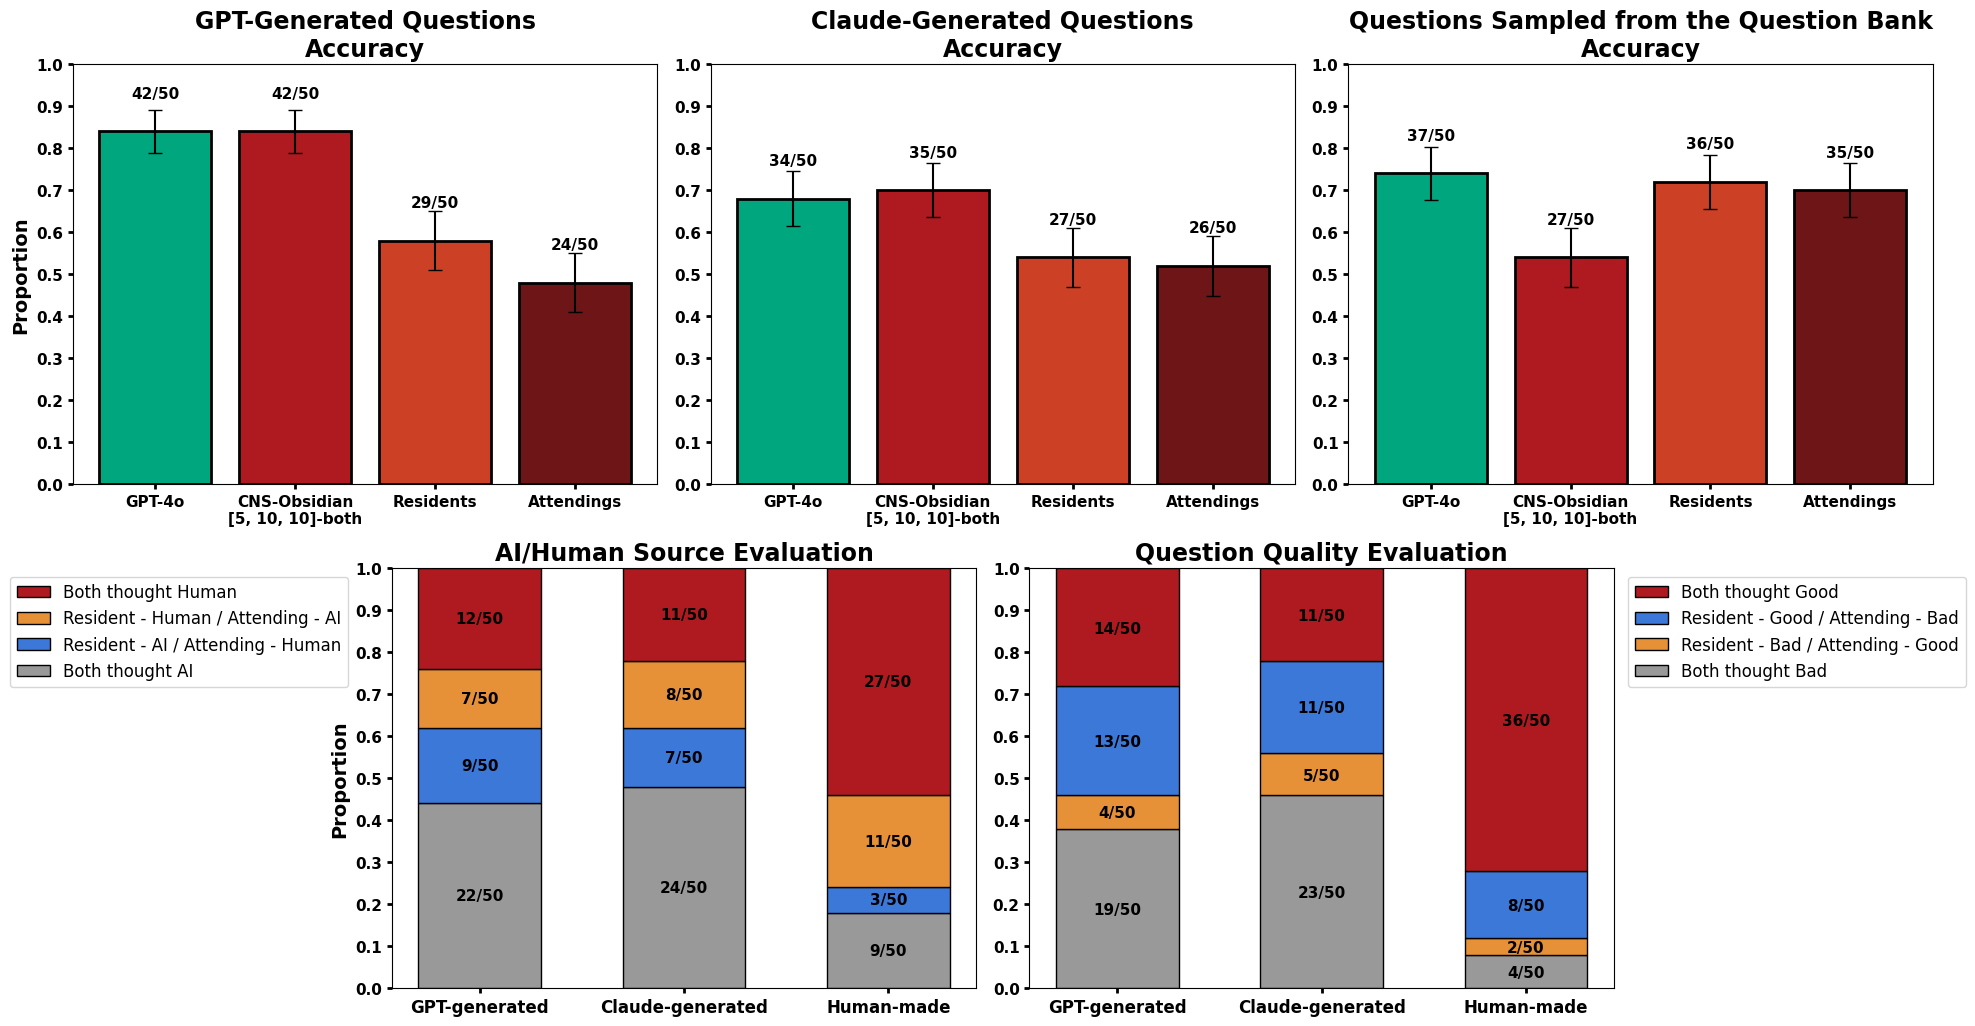

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec

# Define colors
red = "#ae1a1fff"
red_helper_1 = "#cc4125ff"
red_helper_2 = "#6e1517ff"
yellow = "#e69138ff"
blue = "#3c78d8ff"
grey = "#999999ff"
green = "#00a67eff"
brown = "#b85c00ff"

# Names and datasets are assumed to be defined from your previous code
names = [
    "GPT-Generated Questions",
    "Claude-Generated Questions",
    "Questions Sampled from the Question Bank"
]
model_groups = [
    ['gpt_accuracy', 'obsidian_accuracy', 'res_accuracy', 'attn_accuracy'],  # Performance metrics
    ['res_quality', 'attn_quality'],  # Liked Question
    ['res_source_correct', 'attn_source_correct']  # AI/Human Guess
]

# Create a 2x6 grid
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(2, 6, figure=fig)

# Top row: Merged plots for performance metrics (3 plots, 4 bars each)
for i, (key, dataset) in enumerate(datasets.items()):
    ax = fig.add_subplot(gs[0, 2*i:2*i+2])
    name = names[i]
    n = 50  # Sample size is always 50

    # Performance data (first 4 bars)
    performance_data = [dataset[metric] for metric in model_groups[0]]

    # Calculate error bars (standard error for proportions)
    errors = np.sqrt(np.array(performance_data) * (1 - np.array(performance_data)) / n)

    # Plot with error bars
    bars = ax.bar(
        model_groups[0],
        performance_data,
        color=[green, red, red_helper_1, red_helper_2],
        edgecolor='black',
        linewidth=2
    )
    ax.errorbar(
        model_groups[0],
        performance_data,
        yerr=errors,
        fmt='none',
        color='black',
        capsize=5
    )

    # Add data labels
    for j, value in enumerate(performance_data):
        ax.text(
            j,
            value + 0.08,
            f"{int(np.round(value * n, 0))}/{n}",
            ha='center',
            fontsize=11,
            fontweight='bold'
        )

    ax.set_ylim(0, 1)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(
        ["GPT-4o", "CNS-Obsidian\n[5, 10, 10]-both", "Residents", "Attendings"],  # Updated labels
        fontsize=11,
        fontweight='bold',
        ha='center'  # Make them horizontal
    )
    ax.set_yticks(np.linspace(0, 1, 11))
    ax.set_yticklabels(
        np.round(np.linspace(0, 1, 11), 1),
        fontsize=11,
        fontweight='bold'
    )
    if not i:
        ax.set_ylabel('Proportion', fontsize=14, fontweight='bold')
    ax.tick_params(axis='both', which='both', width=2)
    ax.set_title(f"{name}\nAccuracy", fontsize=17, fontweight='bold')

# Prepare data for the bottom plots (assuming df is defined from your previous code)
sources_order = ['gpt', 'claude', 'sans']
source_labels = ['GPT-generated', 'Claude-generated', 'Human-made']

# Create new columns for AI/Human Source Guess
df['both_human'] = ((df['source_attn'] != 'AI') & (df['source_res'] != 'AI')).astype(int)
df['only_attn_ai'] = ((df['source_attn'] == 'AI') & (df['source_res'] != 'AI')).astype(int)
df['only_res_ai'] = ((df['source_attn'] != 'AI') & (df['source_res'] == 'AI')).astype(int)
df['both_ai'] = ((df['source_attn'] == 'AI') & (df['source_res'] == 'AI')).astype(int)

# Create new columns for Good Question
df['both_bad'] = ((df['quality_attn'] != 'Yes') & (df['quality_res'] != 'Yes')).astype(int)
df['only_res_good'] = ((df['quality_attn'] != 'Yes') & (df['quality_res'] == 'Yes')).astype(int)
df['only_attn_good'] = ((df['quality_attn'] == 'Yes') & (df['quality_res'] != 'Yes')).astype(int)
df['both_good'] = ((df['quality_attn'] == 'Yes') & (df['quality_res'] == 'Yes')).astype(int)

# Prepare data for AI/Human Source Guess plot
ai_human_counts = {}
for src in sources_order:
    subset = df[df['source'] == src]
    total = len(subset)
    ai_human_counts[src] = {
        'both_human': subset['both_human'].sum(),
        'only_attn_ai': subset['only_attn_ai'].sum(),
        'only_res_ai': subset['only_res_ai'].sum(),
        'both_ai': subset['both_ai'].sum(),
        'total': total
    }

# Prepare data for Good Question plot
good_question_counts = {}
for src in sources_order:
    subset = df[df['source'] == src]
    total = len(subset)
    good_question_counts[src] = {
        'both_bad': subset['both_bad'].sum(),
        'only_res_good': subset['only_res_good'].sum(),
        'only_attn_good': subset['only_attn_good'].sum(),
        'both_good': subset['both_good'].sum(),
        'total': total
    }

# Extract proportions for AI/Human Source Guess plot
ai_human_proportions = {
    'both_human': [],
    'only_attn_ai': [],
    'only_res_ai': [],
    'both_ai': []
}

for src in sources_order:
    total = ai_human_counts[src]['total']
    ai_human_proportions['both_human'].append(ai_human_counts[src]['both_human'] / total if total > 0 else 0)
    ai_human_proportions['only_attn_ai'].append(ai_human_counts[src]['only_attn_ai'] / total if total > 0 else 0)
    ai_human_proportions['only_res_ai'].append(ai_human_counts[src]['only_res_ai'] / total if total > 0 else 0)
    ai_human_proportions['both_ai'].append(ai_human_counts[src]['both_ai'] / total if total > 0 else 0)

# Extract proportions for Good Question plot
good_question_proportions = {
    'both_bad': [],
    'only_res_good': [],
    'only_attn_good': [],
    'both_good': []
}

for src in sources_order:
    total = good_question_counts[src]['total']
    good_question_proportions['both_bad'].append(good_question_counts[src]['both_bad'] / total if total > 0 else 0)
    good_question_proportions['only_res_good'].append(good_question_counts[src]['only_res_good'] / total if total > 0 else 0)
    good_question_proportions['only_attn_good'].append(good_question_counts[src]['only_attn_good'] / total if total > 0 else 0)
    good_question_proportions['both_good'].append(good_question_counts[src]['both_good'] / total if total > 0 else 0)

# Start plotting the bottom row
# Define positions
x = np.arange(len(sources_order))  # positions for the bars
bar_width = 0.6

# Colors and labels for both bottom plots
colors = [grey, blue, yellow, red]

# AI/Human Source Guess plot
ax1 = fig.add_subplot(gs[1, 1:3])  # Take half of the bottom row

# Data for stacking with adjusted order
# Desired stacking order:
# Bottom -> Both thought AI
# Then -> Resident - AI / Attending - Human
# Then -> Resident - Human / Attending - AI
# Top -> Both thought Human

both_ai = np.array(ai_human_proportions['both_ai'])
only_res_ai = np.array(ai_human_proportions['only_res_ai'])
only_attn_ai = np.array(ai_human_proportions['only_attn_ai'])
both_human = np.array(ai_human_proportions['both_human'])

# Stack the bars in the desired order
p1 = ax1.bar(
    x,
    both_ai,
    bar_width,
    color=grey,
    edgecolor='black',
    label='Both thought AI'
)
p2 = ax1.bar(
    x,
    only_res_ai,
    bar_width,
    bottom=both_ai,
    color=blue,
    edgecolor='black',
    label='Resident - AI / Attending - Human'
)
cumulative_bottom = both_ai + only_res_ai
p3 = ax1.bar(
    x,
    only_attn_ai,
    bar_width,
    bottom=cumulative_bottom,
    color=yellow,
    edgecolor='black',
    label='Resident - Human / Attending - AI'
)
cumulative_bottom += only_attn_ai
p4 = ax1.bar(
    x,
    both_human,
    bar_width,
    bottom=cumulative_bottom,
    color=red,
    edgecolor='black',
    label='Both thought Human'
)

# Set labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(
    source_labels,
    fontsize=12,
    fontweight='bold',
    ha='center'  # Make them horizontal
)
ax1.set_yticks(np.linspace(0, 1, 11))
ax1.set_yticklabels(
    np.round(np.linspace(0, 1, 11), 1),
    fontsize=11,
    fontweight='bold'
)
ax1.set_ylabel('Proportion', fontsize=14, fontweight='bold')
ax1.set_title('AI/Human Source Evaluation', fontsize=17, fontweight='bold')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(
    handles[::-1],  # Reverse the handles
    labels[::-1],  # Reverse the labels
    fontsize=12,
    bbox_to_anchor=(-.06, 1)
)
ax1.tick_params(axis='both', which='both', width=2)

# Add counts on top of each segment
for i in range(len(x)):
    cumulative = 0
    total = ai_human_counts[sources_order[i]]['total']
    counts = [
        ai_human_counts[sources_order[i]]['both_ai'],
        ai_human_counts[sources_order[i]]['only_res_ai'],
        ai_human_counts[sources_order[i]]['only_attn_ai'],
        ai_human_counts[sources_order[i]]['both_human'],
    ]
    proportions = [
        both_ai[i],
        only_res_ai[i],
        only_attn_ai[i],
        both_human[i],
    ]
    for j in range(len(counts)):
        if proportions[j] > 0:
            ax1.text(
                i,
                cumulative + proportions[j] / 2,
                f"{counts[j]}/{total}",
                ha='center',
                va='center',
                fontsize=11,
                fontweight='bold'
            )
        cumulative += proportions[j]

ax1.set_ylim(0, 1)

# Good Question plot
ax2 = fig.add_subplot(gs[1, 3:-1])  # Take the other half of the bottom row

# Data for stacking
both_bad = np.array(good_question_proportions['both_bad'])
only_res_good = np.array(good_question_proportions['only_res_good'])
only_attn_good = np.array(good_question_proportions['only_attn_good'])
both_good = np.array(good_question_proportions['both_good'])

# Stack the bars with adjusted order
# Desired stacking order from bottom to top:
# 1. Both thought Bad
# 2. Resident - Bad / Attending - Good (only_attn_good)
# 3. Resident - Good / Attending - Bad (only_res_good)
# 4. Both thought Good

# Plot the bottom layer
p1 = ax2.bar(
    x,
    both_bad,
    bar_width,
    color=grey,
    edgecolor='black',
    label='Both thought Bad'
)

# Second layer (swapped)
p2 = ax2.bar(
    x,
    only_attn_good,
    bar_width,
    bottom=both_bad,
    color=yellow,
    edgecolor='black',
    label='Resident - Bad / Attending - Good'
)

# Update cumulative bottom
cumulative_bottom = both_bad + only_attn_good

# Third layer (swapped)
p3 = ax2.bar(
    x,
    only_res_good,
    bar_width,
    bottom=cumulative_bottom,
    color=blue,
    edgecolor='black',
    label='Resident - Good / Attending - Bad'
)

# Update cumulative bottom
cumulative_bottom += only_res_good

# Top layer
p4 = ax2.bar(
    x,
    both_good,
    bar_width,
    bottom=cumulative_bottom,
    color=red,
    edgecolor='black',
    label='Both thought Good'
)

# Set labels and title
ax2.set_xticks(x)
ax2.set_xticklabels(
    source_labels,
    fontsize=12,
    fontweight='bold',
    ha='center'  # Make them horizontal
)
ax2.set_yticks(np.linspace(0, 1, 11))
ax2.set_yticklabels(
    np.round(np.linspace(0, 1, 11), 1),
    fontsize=11,
    fontweight='bold'
)
ax2.set_title('Question Quality Evaluation', fontsize=17, fontweight='bold')
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(
    handles[::-1],  # Reverse the handles
    labels[::-1],   # Reverse the labels
    fontsize=12,
    bbox_to_anchor=(1.01, 1)
)
ax2.tick_params(axis='both', which='both', width=2)

# Add counts on top of each segment
for i in range(len(x)):
    total = good_question_counts[sources_order[i]]['total']
    counts = [
        good_question_counts[sources_order[i]]['both_bad'],
        good_question_counts[sources_order[i]]['only_attn_good'],  # Swapped
        good_question_counts[sources_order[i]]['only_res_good'],   # Swapped
        good_question_counts[sources_order[i]]['both_good'],
    ]
    proportions = [
        both_bad[i],
        only_attn_good[i],  # Swapped
        only_res_good[i],   # Swapped
        both_good[i],
    ]
    cumulative = 0
    for j in range(len(counts)):
        if proportions[j] > 0:
            y = cumulative + proportions[j] / 2 - 0.003
            ax2.text(
                i,
                y,
                f"{counts[j]}/{total}",
                ha='center',
                va='center',
                fontsize=11,
                fontweight='bold',
                color='black'
            )
        cumulative += proportions[j]
ax2.set_ylim(0, 1)

#plt.tight_layout()
fig.savefig(f"./figures/mcqs_figure_3.png", format='png', dpi=1200, bbox_inches='tight')
fig.savefig(f"./figures/mcqs_figure_3.tiff", format='tiff', dpi=600, bbox_inches='tight')
plt.show()

In [13]:
# --- Save each panel individually with full context ---

# Accuracy panels (top row)
for i, (key, dataset) in enumerate(datasets.items()):
    fig_single, ax = plt.subplots(figsize=(6, 6))
    n = 50
    performance_data = [dataset[metric] for metric in model_groups[0]]
    errors = np.sqrt(np.array(performance_data) * (1 - np.array(performance_data)) / n)

    bars = ax.bar(
        model_groups[0],
        performance_data,
        color=[green, red, red_helper_1, red_helper_2],
        edgecolor="black",
        linewidth=2
    )
    ax.errorbar(
        model_groups[0], performance_data, yerr=errors,
        fmt="none", color="black", capsize=5
    )
    for j, value in enumerate(performance_data):
        ax.text(j, value + 0.08, f"{int(np.round(value * n, 0))}/{n}",
                ha="center", fontsize=11, fontweight="bold")

    ax.set_ylim(0, 1)
    ax.set_xticks(np.arange(4))
    ax.set_xticklabels(
        ["GPT-4o", "CNS-Obsidian\n[5,10,10]-both", "Residents", "Attendings"],
        fontsize=11, fontweight="bold"
    )
    ax.set_yticks(np.linspace(0, 1, 11))
    ax.set_yticklabels(np.round(np.linspace(0, 1, 11), 1), fontsize=11, fontweight="bold")
    ax.set_ylabel("Proportion", fontsize=14, fontweight="bold")
    ax.set_title(f"{names[i]}\nAccuracy", fontsize=17, fontweight="bold")
    ax.tick_params(axis="both", which="both", width=2)

    fig_single.savefig(f"./figures/mcqs_figure_3{['a', 'b', 'c'][i]}.tiff",
                       format="tiff", dpi=600, bbox_inches="tight")
    plt.close(fig_single)

# Panel d (AI/Human Source Guess)
fig_ai, ax1 = plt.subplots(figsize=(7, 7))

x = np.arange(len(sources_order))
bar_width = 0.6

both_ai = np.array(ai_human_proportions['both_ai'])
only_res_ai = np.array(ai_human_proportions['only_res_ai'])
only_attn_ai = np.array(ai_human_proportions['only_attn_ai'])
both_human = np.array(ai_human_proportions['both_human'])

# Stacked bars
ax1.bar(x, both_ai, bar_width, color=grey, edgecolor='black', label='Both thought AI')
ax1.bar(x, only_res_ai, bar_width, bottom=both_ai, color=blue, edgecolor='black',
        label='Resident - AI / Attending - Human')
ax1.bar(x, only_attn_ai, bar_width, bottom=both_ai + only_res_ai, color=yellow, edgecolor='black',
        label='Resident - Human / Attending - AI')
ax1.bar(x, both_human, bar_width, bottom=both_ai + only_res_ai + only_attn_ai,
        color=red, edgecolor='black', label='Both thought Human')

# Labels, ticks, legend
ax1.set_xticks(x)
ax1.set_xticklabels(source_labels, fontsize=12, fontweight='bold')
ax1.set_yticks(np.linspace(0, 1, 11))
ax1.set_yticklabels(np.round(np.linspace(0, 1, 11), 1), fontsize=11, fontweight='bold')
ax1.set_ylabel('Proportion', fontsize=14, fontweight='bold')
ax1.set_title('AI/Human Source Evaluation', fontsize=17, fontweight='bold')
ax1.legend(fontsize=12, bbox_to_anchor=(-.06, 1))
ax1.tick_params(axis='both', which='both', width=2)

# Add counts
for i in range(len(x)):
    cumulative = 0
    total = ai_human_counts[sources_order[i]]['total']
    counts = [
        ai_human_counts[sources_order[i]]['both_ai'],
        ai_human_counts[sources_order[i]]['only_res_ai'],
        ai_human_counts[sources_order[i]]['only_attn_ai'],
        ai_human_counts[sources_order[i]]['both_human'],
    ]
    proportions = [both_ai[i], only_res_ai[i], only_attn_ai[i], both_human[i]]
    for j in range(len(counts)):
        if proportions[j] > 0:
            ax1.text(i, cumulative + proportions[j] / 2,
                     f"{counts[j]}/{total}",
                     ha='center', va='center',
                     fontsize=11, fontweight='bold')
        cumulative += proportions[j]

ax1.set_ylim(0, 1)
fig_ai.savefig("./figures/mcqs_figure_ed.tiff", format="tiff", dpi=600, bbox_inches="tight")
plt.close(fig_ai)


# Panel e (Question Quality)
fig_quality, ax2 = plt.subplots(figsize=(7, 7))

both_bad = np.array(good_question_proportions['both_bad'])
only_res_good = np.array(good_question_proportions['only_res_good'])
only_attn_good = np.array(good_question_proportions['only_attn_good'])
both_good = np.array(good_question_proportions['both_good'])

# Stacked bars
ax2.bar(x, both_bad, bar_width, color=grey, edgecolor='black', label='Both thought Bad')
ax2.bar(x, only_attn_good, bar_width, bottom=both_bad, color=yellow, edgecolor='black',
        label='Resident - Bad / Attending - Good')
ax2.bar(x, only_res_good, bar_width, bottom=both_bad + only_attn_good, color=blue, edgecolor='black',
        label='Resident - Good / Attending - Bad')
ax2.bar(x, both_good, bar_width, bottom=both_bad + only_attn_good + only_res_good,
        color=red, edgecolor='black', label='Both thought Good')

# Labels, ticks, legend
ax2.set_xticks(x)
ax2.set_xticklabels(source_labels, fontsize=12, fontweight='bold')
ax2.set_yticks(np.linspace(0, 1, 11))
ax2.set_yticklabels(np.round(np.linspace(0, 1, 11), 1), fontsize=11, fontweight='bold')
ax2.set_title('Question Quality Evaluation', fontsize=17, fontweight='bold')
ax2.legend(fontsize=12, bbox_to_anchor=(1.01, 1))
ax2.tick_params(axis='both', which='both', width=2)

# Add counts
for i in range(len(x)):
    total = good_question_counts[sources_order[i]]['total']
    counts = [
        good_question_counts[sources_order[i]]['both_bad'],
        good_question_counts[sources_order[i]]['only_attn_good'],
        good_question_counts[sources_order[i]]['only_res_good'],
        good_question_counts[sources_order[i]]['both_good'],
    ]
    proportions = [both_bad[i], only_attn_good[i], only_res_good[i], both_good[i]]
    cumulative = 0
    for j in range(len(counts)):
        if proportions[j] > 0:
            y = cumulative + proportions[j] / 2 - 0.003
            ax2.text(i, y, f"{counts[j]}/{total}",
                     ha='center', va='center',
                     fontsize=11, fontweight='bold')
        cumulative += proportions[j]

ax2.set_ylim(0, 1)
fig_quality.savefig("./figures/mcqs_figure_3e.tiff", format="tiff", dpi=600, bbox_inches="tight")
plt.close(fig_quality)



In [14]:
df.groupby("source")["source_attn"].value_counts().sort_index()

source  source_attn
claude  AI             32
        Human          18
gpt     AI             29
        Human          21
sans    AI             20
        Human          30
Name: count, dtype: int64

In [15]:
import scipy
print(scipy.stats.fisher_exact(
        [[30, 20],
         [21, 29]],
         alternative = 'two-sided'))
print(scipy.stats.fisher_exact(
    [[30, 20],
     [18, 32]],
     alternative = 'two-sided'))

SignificanceResult(statistic=np.float64(2.0714285714285716), pvalue=np.float64(0.10908307798864122))
SignificanceResult(statistic=np.float64(2.6666666666666665), pvalue=np.float64(0.027184075121116265))


In [16]:
df.groupby("source")["source_res"].value_counts().sort_index()

source  source_res
claude  AI            31
        Human         19
gpt     AI            31
        Human         19
sans    AI            12
        Human         38
Name: count, dtype: int64

In [17]:
print(scipy.stats.fisher_exact(
    [[38, 12],
     [19, 31]],
         alternative = 'two-sided'))
print(scipy.stats.fisher_exact(
    [[38, 12],
     [19, 31]],
     alternative = 'two-sided'))

SignificanceResult(statistic=np.float64(5.166666666666667), pvalue=np.float64(0.00023509151446691654))
SignificanceResult(statistic=np.float64(5.166666666666667), pvalue=np.float64(0.00023509151446691654))


In [18]:
df.groupby("source")["quality_attn"].value_counts().sort_index()

source  quality_attn
claude  No              34
        Yes             16
gpt     No              32
        Yes             18
sans    No              12
        Yes             38
Name: count, dtype: int64

In [19]:
import scipy
print(scipy.stats.fisher_exact(
        [[38, 12],
         [18, 32]],
         alternative = 'two-sided'))
print(scipy.stats.fisher_exact(
        [[38, 12],
         [16, 34]],
     alternative = 'two-sided'))

SignificanceResult(statistic=np.float64(5.62962962962963), pvalue=np.float64(0.00010596921021958268))
SignificanceResult(statistic=np.float64(6.729166666666667), pvalue=np.float64(1.8848337325429806e-05))


In [20]:
df.groupby("source")["quality_res"].value_counts().sort_index()

source  quality_res
claude  No             28
        Yes            22
gpt     No             23
        Yes            27
sans    No              6
        Yes            44
Name: count, dtype: int64

In [21]:
import scipy
print(scipy.stats.fisher_exact(
        [[44, 6],
         [22, 27]],
         alternative = 'two-sided'))
print(scipy.stats.fisher_exact(
        [[44, 6],
         [22, 28]],
     alternative = 'two-sided'))

SignificanceResult(statistic=np.float64(9.0), pvalue=np.float64(5.387886555196878e-06))
SignificanceResult(statistic=np.float64(9.333333333333334), pvalue=np.float64(5.387886555196878e-06))


In [22]:
print(scipy.stats.fisher_exact(
        [[36, 14],
         [25, 75]],
     alternative = 'two-sided'))

SignificanceResult(statistic=np.float64(7.714285714285714), pvalue=np.float64(5.471032335602007e-08))
